In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("/Users/akshatrastogi/Desktop/admission.csv")
data

,Serial No.,GRE Score,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
######################### Minimum and Maximum GRE score ########################################

column = data["GRE Score"]
max_value = column.max()
print(max_value)
min_value = column.min()
print(min_value)

340
290


In [7]:
shape = data.shape
print(shape)

(500, 9)


In [8]:
#This allow a random selection of the same row more than once
data = data.sample(n=10,replace=True)
data

,Serial No.,GRE Score,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
180,181,300,104,3,3.5,3.0,8.16,0,0.71
316,317,298,101,2,1.5,2.0,7.86,0,0.54
463,464,304,107,3,3.5,3.0,7.86,0,0.57
130,131,339,114,5,4.0,4.5,9.76,1,0.96
328,329,324,112,4,4.0,3.5,8.77,1,0.80
431,432,320,112,2,3.5,3.5,8.78,1,0.73
139,140,318,109,1,3.5,3.5,9.12,0,0.78
422,423,322,112,4,3.5,2.5,9.02,1,0.73
156,157,315,105,3,2.0,2.5,8.34,0,0.70
194,195,316,109,3,3.5,3.0,8.76,0,0.77


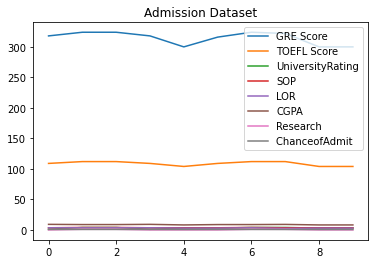

In [13]:
data = data.sample(n=10,replace=True)
# get columns to plot
columns = data.columns.drop(['Serial No.'])
# create x data
x_data = range(0, data.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, data[column], label=column)
# set title and legend
ax.set_title('Admission Dataset')
ax.legend()

In [28]:
grouped_data = data.groupby(['UniversityRating', data.index]).agg({'UniversityRating': 'sum'})
print(grouped_data)
percents_data = grouped_data.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(percents_data)

                      UniversityRating
UniversityRating                      
1                317                 1
2                90                  2
                 157                 2
3                320                 3
                 341                 3
                 395                 3
                 476                 3
4                185                 4
                 442                 4
5                131                 5
                      UniversityRating
UniversityRating                      
1                317             100.0
2                90               50.0
                 157              50.0
3                320              25.0
                 341              25.0
                 395              25.0
                 476              25.0
4                185              50.0
                 442              50.0
5                131             100.0


In [55]:
data['UniversityRating'] = (data['UniversityRating'] / data['Research'].sum()) * 100

In [39]:
pip install pydotplus

Accuracy: 0.72


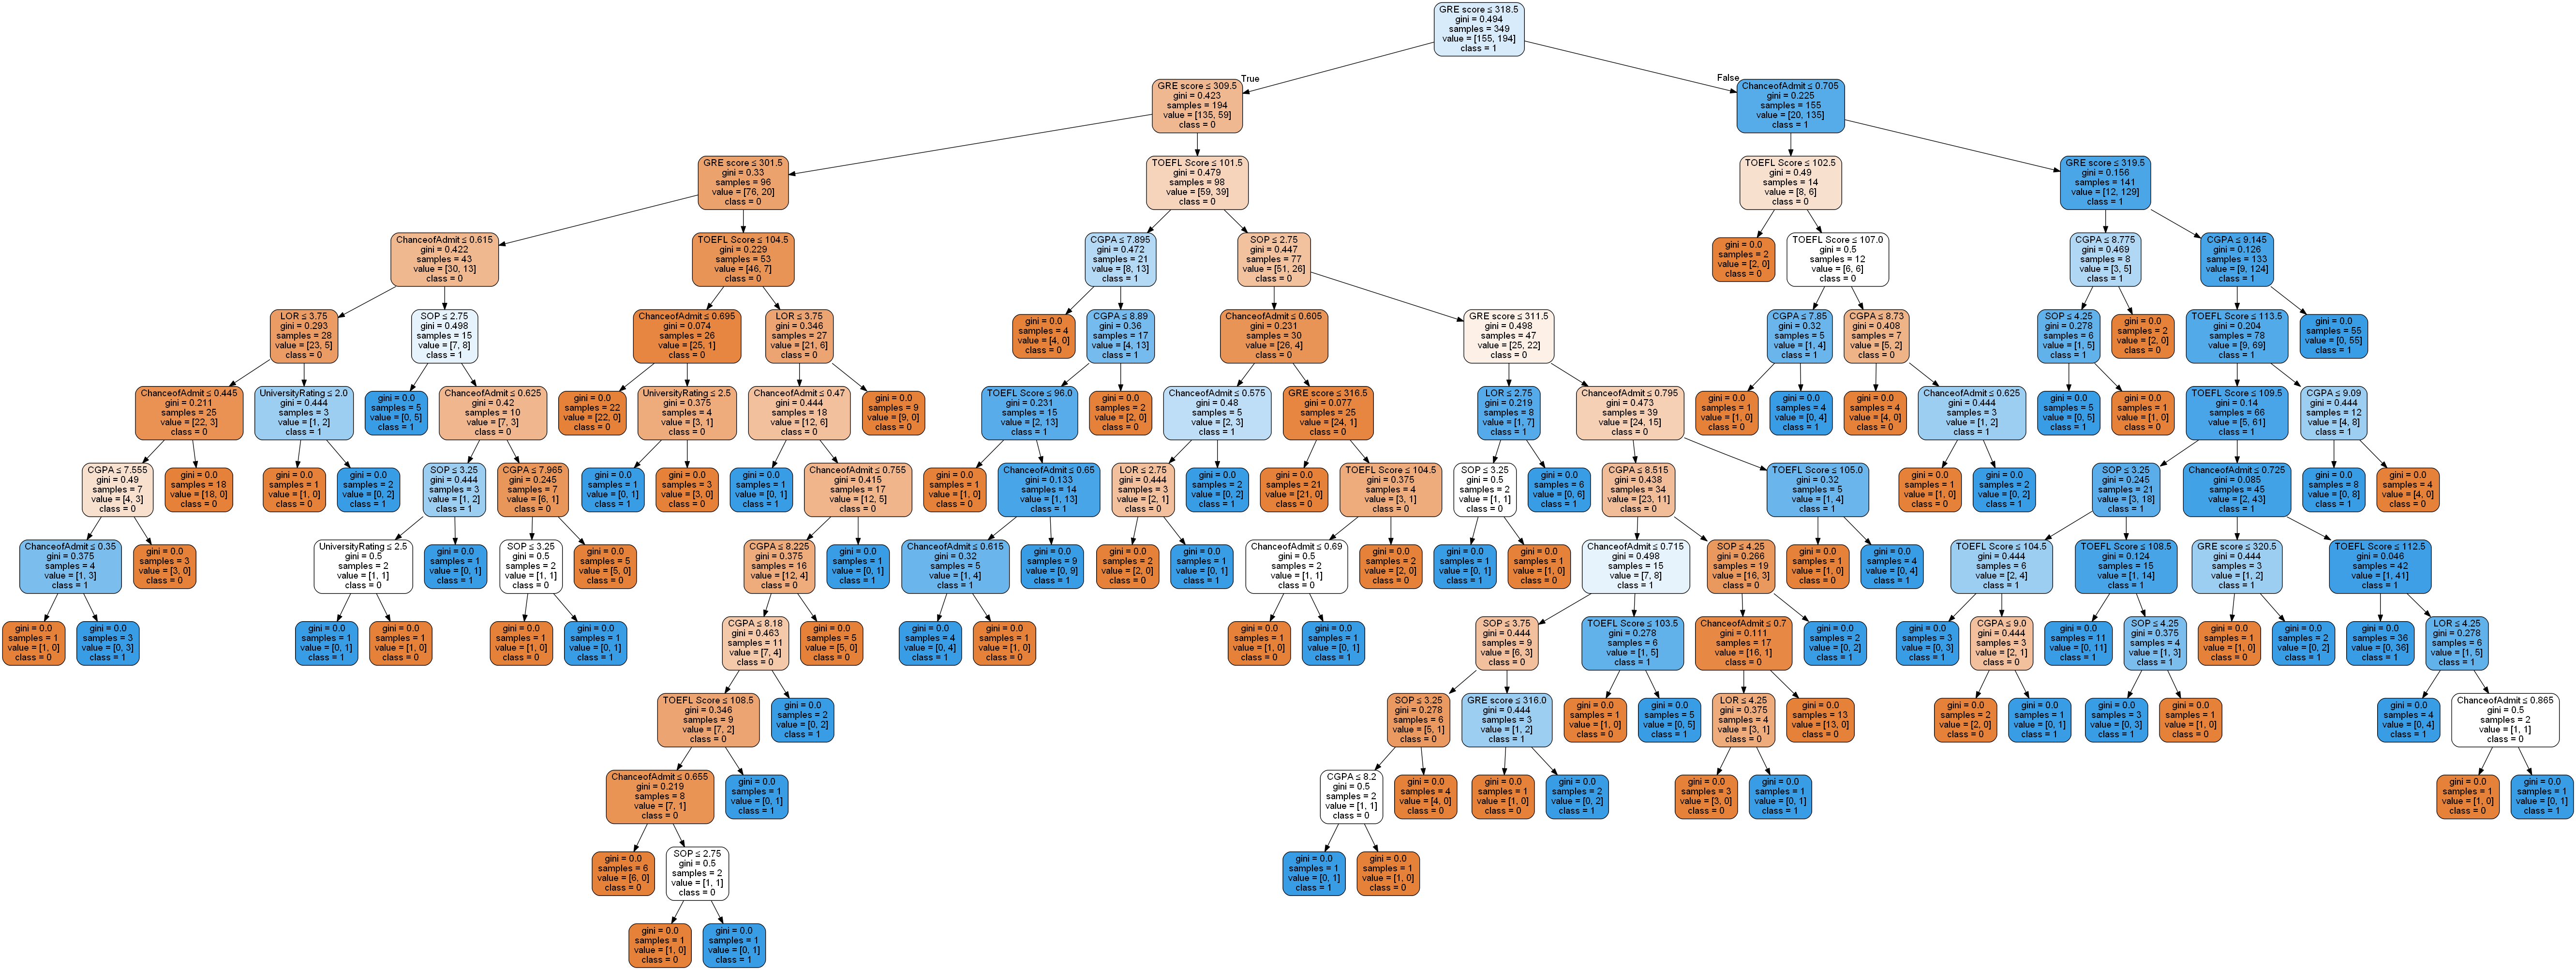

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


col_names = ['GRE score', 'TOEFL Score', 'UniversityRating', 'SOP','LOR','CGPA','Research','ChanceofAdmit']
# load dataset
pima = pd.read_csv(r"admission.csv", header=1, names=col_names)
pima.head()

#split dataset in features and target variable
feature_cols = ['GRE score', 'TOEFL Score', 'UniversityRating', 'SOP','LOR','CGPA','ChanceofAdmit']
X = pima[feature_cols] # Features
y = pima.Research # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO    
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('admission.png')
Image(graph.create_png())

In [16]:
####################################### Random Forest ###########################################

data = pd.read_csv("admission.csv")
data

,Serial No.,GRE Score,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [19]:
data = data.sample(n=10,replace=True)
data

,Serial No.,GRE Score,TOEFL Score,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
157,158,309,104,2,2.0,2.5,8.26,0,0.65
317,318,300,99,1,1.0,2.5,8.01,0,0.58
90,91,318,106,2,4.0,4.0,7.92,1,0.64
442,443,331,116,4,4.5,4.5,9.44,1,0.92
185,186,327,113,4,4.5,4.5,9.11,1,0.89
131,132,303,105,5,5.0,4.5,8.65,0,0.77
320,321,317,106,3,4.0,3.5,8.50,1,0.75
395,396,324,110,3,3.5,3.5,9.04,1,0.82
341,342,326,110,3,3.5,3.5,8.76,1,0.79
476,477,304,104,3,2.5,2.0,8.12,0,0.62


In [35]:
from sklearn.model_selection import train_test_split

X=data[['GRE Score', 'TOEFL Score', 'UniversityRating', 'SOP', 'CGPA']]  # Features
y=data['Research']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
#############################################

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [53]:
#################### Essemble Technique #########################
from array import array
from sklearn.ensemble import GradientBoostingClassifier
X = arr[:, 1:7] 
Y = arr[:, 8] 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=0.30,random_state=12)

"""Now we can try setting different learning rates, 
so that we can compare the performance of the classifier's performance at different learning rates."""

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))
    
from xgboost import XGBClassifier
X = arr[:, 1:7]
Y = arr[:, 8] 
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

score = xgb_clf.score(X_val, y_val)

print(score)

NameError: name 'arr' is not defined